For seed index 0, Myopic: finished 1166 episodes, performed 578032043 timesteps.
For seed index 0, Proactive: finished 1182 episodes, performed 585396114 timesteps.
For seed index 0, Reactive: finished 1194 episodes, performed 595090576 timesteps.


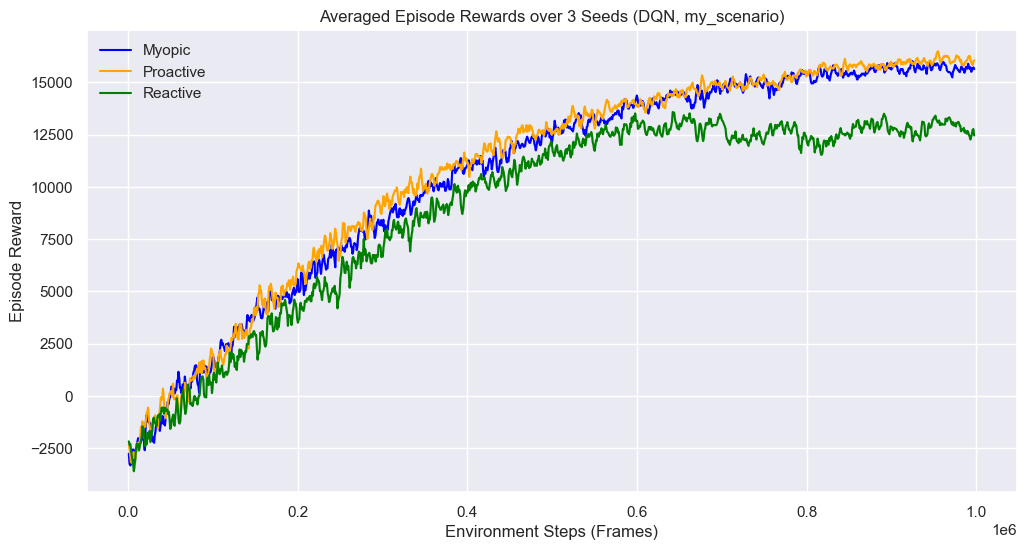

Averaged reward vs steps plot saved to big-run/plots/0448/averaged_rewards_over_steps_my_scenario.png


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Replace with the same seed list you used earlier
SEEDS = [0, 1, 2]  # Example, use your actual seeds
stripped_scenario_folder = "my_scenario"  # Replace with your actual scenario name

# Load the previously saved numpy arrays
all_myopic_runs = np.load('big-run/numpy/all_myopic_runs.npy', allow_pickle=True)
all_proactive_runs = np.load('big-run/numpy/all_proactive_runs.npy', allow_pickle=True)
all_reactive_runs = np.load('big-run/numpy/all_reactive_runs.npy', allow_pickle=True)

all_myopic_steps_runs = np.load('big-run/numpy/all_myopic_steps_runs.npy', allow_pickle=True)
all_proactive_steps_runs = np.load('big-run/numpy/all_proactive_steps_runs.npy', allow_pickle=True)
all_reactive_steps_runs = np.load('big-run/numpy/all_reactive_steps_runs.npy', allow_pickle=True)

all_test_rewards_myopic = np.load('big-run/numpy/all_test_rewards_myopic.npy', allow_pickle=True)
all_test_rewards_proactive = np.load('big-run/numpy/all_test_rewards_proactive.npy', allow_pickle=True)
all_test_rewards_reactive = np.load('big-run/numpy/all_test_rewards_reactive.npy', allow_pickle=True)

# Compute dimensions
num_seeds_myopic = all_myopic_runs.shape[0]
num_episodes_myopic = all_myopic_runs.shape[1] if num_seeds_myopic > 0 else 0
num_seeds_proactive = all_proactive_runs.shape[0]
num_episodes_proactive = all_proactive_runs.shape[1] if num_seeds_proactive > 0 else 0
num_seeds_reactive = all_reactive_runs.shape[0]
num_episodes_reactive = all_reactive_runs.shape[1] if num_seeds_reactive > 0 else 0

# Print summary of episodes and timesteps for each seed/agent
for i in range(num_seeds_myopic):
    total_steps_myopic = all_myopic_steps_runs[i].sum()
    print(f"For seed index {i}, Myopic: finished {num_episodes_myopic} episodes, performed {total_steps_myopic} timesteps.")

for i in range(num_seeds_proactive):
    total_steps_proactive = all_proactive_steps_runs[i].sum()
    print(f"For seed index {i}, Proactive: finished {num_episodes_proactive} episodes, performed {total_steps_proactive} timesteps.")

for i in range(num_seeds_reactive):
    total_steps_reactive = all_reactive_steps_runs[i].sum()
    print(f"For seed index {i}, Reactive: finished {num_episodes_reactive} episodes, performed {total_steps_reactive} timesteps.")

# Compute mean and std across seeds
myopic_mean = all_myopic_runs.mean(axis=0)
myopic_std = all_myopic_runs.std(axis=0)
proactive_mean = all_proactive_runs.mean(axis=0)
proactive_std = all_proactive_runs.std(axis=0)
reactive_mean = all_reactive_runs.mean(axis=0)
reactive_std = all_reactive_runs.std(axis=0)

myopic_steps_mean = all_myopic_steps_runs.mean(axis=0).astype(int)
proactive_steps_mean = all_proactive_steps_runs.mean(axis=0).astype(int)
reactive_steps_mean = all_reactive_steps_runs.mean(axis=0).astype(int)

# Define a smoothing function
def smooth(data, window=10):
    if window > 1 and len(data) >= window:
        return np.convolve(data, np.ones(window)/window, mode='valid')
    return data

# Apply smoothing
smooth_window = 4
myopic_mean_sm = smooth(myopic_mean, smooth_window)
myopic_std_sm = smooth(myopic_std, smooth_window)
myopic_steps_sm = myopic_steps_mean[:len(myopic_mean_sm)]

proactive_mean_sm = smooth(proactive_mean, smooth_window)
proactive_std_sm = smooth(proactive_std, smooth_window)
proactive_steps_sm = proactive_steps_mean[:len(proactive_mean_sm)]

reactive_mean_sm = smooth(reactive_mean, smooth_window)
reactive_std_sm = smooth(reactive_std, smooth_window)
reactive_steps_sm = reactive_steps_mean[:len(reactive_mean_sm)]

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(myopic_steps_sm, myopic_mean_sm, label="Myopic", color='blue')
plt.fill_between(myopic_steps_sm, 
                 myopic_mean_sm - myopic_std_sm, 
                 myopic_mean_sm + myopic_std_sm, 
                 alpha=0.2, color='blue')

plt.plot(proactive_steps_sm, proactive_mean_sm, label="Proactive", color='orange')
plt.fill_between(proactive_steps_sm, 
                 proactive_mean_sm - proactive_std_sm, 
                 proactive_mean_sm + proactive_std_sm, 
                 alpha=0.2, color='orange')

plt.plot(reactive_steps_sm, reactive_mean_sm, label="Reactive", color='green')
plt.fill_between(reactive_steps_sm, 
                 reactive_mean_sm - reactive_std_sm, 
                 reactive_mean_sm + reactive_std_sm, 
                 alpha=0.2, color='green')

plt.xlabel("Environment Steps (Frames)")
plt.ylabel("Episode Reward")
plt.title(f"Averaged Episode Rewards over {len(SEEDS)} Seeds (DQN, {stripped_scenario_folder})")
plt.legend(frameon=False)
plt.grid(True)

# Save plot
results_dir = "./results"
os.makedirs(results_dir, exist_ok=True)

# Create a timestamped directory within big-run/plots
current_time = datetime.now()
seconds_str = str(int(current_time.timestamp()))[-4:]
plots_dir = os.path.join("big-run", "plots", seconds_str)
os.makedirs(plots_dir, exist_ok=True)

plot_file = os.path.join(plots_dir, f"averaged_rewards_over_steps_{stripped_scenario_folder}.png")
plt.savefig(plot_file)
plt.show()

print(f"Averaged reward vs steps plot saved to {plot_file}")
